# détecter les attaques pour tous les types d'attaque  

In [1]:
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
# obtenir la longueur de lien(information)
def get_len(info_comp):
    return len(info_comp)

# obtenir des symboles spécials pour logs sql
def get_sql_char(info_comp):
    return len(re.findall("[?=\*#@%>]", info_comp, re.IGNORECASE))

# obtenir des mots spécials pour logs sql
def get_sql_word(info_comp):
    return len(re.findall("(SELECT)|(version)|(comment)|(user)|(FROM)|(mysql)|(host)|(DELET)|(name)|(MYSQL)|(WHERE)|(password)|(ORDER)",info_comp,re.IGNORECASE))

# obtenir des symboles spécials pour logs xss
def get_xss_char(info_comp):
    return len(re.findall("[<>\"\'=&{}!#\*]", info_comp, re.IGNORECASE))

# obtenir des mots spécials pour logs xss
def get_xss_word(info_comp):
    return len(re.findall("(alert)|(script)|(XSS)|(SRC=)|(xss)|(onerror)|(onload)|(BODY)|(src=)|(INPUT)|(http)|(LINK)|(url=)|(SCRIPT)",info_comp,re.IGNORECASE))


def get_feature(info_comp):
    return [get_len(info_comp),get_evil_char(info_comp),get_evil_word(info_comp)]


# import data

## normal:12000  brut force:128056  sql:235  xss:452

In [2]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame
data_logs = pd.read_csv("./data/moredonnee.csv")
data_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label
0,0,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1
1,1,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1
2,2,136.133.92.208,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1
3,3,30.142.97.121,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1
4,4,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1
5,5,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1
6,6,136.133.92.208,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1
7,7,136.133.92.208,22/Jan/2018,15,2,6,GET,director,123456,304,-,2,1
8,8,136.133.92.208,22/Jan/2018,15,2,7,GET,director,123456,304,-,9,1
9,9,30.142.97.121,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1


# ajouter nouveau feature
### ajouter des features longueur, des symboles spécials et des mots spécials pour des logs

In [3]:
f=lambda x: str(x)
data_logs['len']=data_logs['password'].apply(f).apply(get_len)
data_logs['sqlchar']=data_logs['password'].apply(f).apply(get_sql_char)
data_logs['sqlword']=data_logs['password'].apply(f).apply(get_sql_word)
data_logs['xsschar']=data_logs['password'].apply(f).apply(get_xss_char)
data_logs['xssword']=data_logs['password'].apply(f).apply(get_xss_word)
data_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword
0,0,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1,6,0,0,0,0
1,1,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1,6,0,0,0,0
2,2,136.133.92.208,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1,6,0,0,0,0
3,3,30.142.97.121,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1,6,0,0,0,0
4,4,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1,6,0,0,0,0
5,5,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1,6,0,0,0,0
6,6,136.133.92.208,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1,6,0,0,0,0
7,7,136.133.92.208,22/Jan/2018,15,2,6,GET,director,123456,304,-,2,1,6,0,0,0,0
8,8,136.133.92.208,22/Jan/2018,15,2,7,GET,director,123456,304,-,9,1,6,0,0,0,0
9,9,30.142.97.121,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1,6,0,0,0,0


# transformer la forme de l'adresse ip

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_logs['ip_address'] = le.fit_transform(data_logs['ip_address'].apply(f)) 
data_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword
0,0,333,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1,6,0,0,0,0
1,1,333,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1,6,0,0,0,0
2,2,333,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1,6,0,0,0,0
3,3,1424,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1,6,0,0,0,0
4,4,1424,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1,6,0,0,0,0
5,5,1424,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1,6,0,0,0,0
6,6,333,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1,6,0,0,0,0
7,7,333,22/Jan/2018,15,2,6,GET,director,123456,304,-,2,1,6,0,0,0,0
8,8,333,22/Jan/2018,15,2,7,GET,director,123456,304,-,9,1,6,0,0,0,0
9,9,1424,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1,6,0,0,0,0


In [5]:
del data_logs[data_logs.columns[0]]

# arrange feature
### remplacer des données null au 0

In [6]:
def replace(resp):
    if resp == '-':
        resp=0
    elif (resp==resp)==False:
        resp=0
    return (resp)
data_logs['respsize']=data_logs['respsize'].apply(replace)
data_logs['timed']=data_logs['timed'].apply(replace)
data_logs['status']=data_logs['status'].apply(replace)

# la visualisation de la performance

In [7]:
from sklearn import metrics
def do_metrics(y_test,y_pred):
    print ("metrics.confusion_matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    print ("metrics.accuracy_score:")
    print (metrics.accuracy_score(y_test, y_pred))
    print ("metrics.precision_score:")
    print (metrics.precision_score(y_test, y_pred))
    print ("metrics.recall_score:")
    print (metrics.recall_score(y_test, y_pred))
    print ("metrics.f1_score:")
    print (metrics.f1_score(y_test,y_pred))

In [8]:
import matplotlib.pyplot as plt
def plot_cm(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way
    
    print ('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print ("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    # Show confusion matrix
    # Thanks kermit666 from stackoverflow :)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='Greens')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# utiliser des features sans l'adresse ip

In [9]:
features = list(data_logs.columns[[8,9,10,12,13,14,15,16]])
X = data_logs[features]
X

,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword
0,200,1040,312,6,0,0,0,0
1,200,945,14,6,0,0,0,0
2,200,34463,9,6,0,0,0,0
3,200,1040,2,6,0,0,0,0
4,200,945,9,6,0,0,0,0
5,200,34463,7,6,0,0,0,0
6,200,1073,2547,6,0,0,0,0
7,304,0,2,6,0,0,0,0
8,304,0,9,6,0,0,0,0
9,200,1073,1583,6,0,0,0,0


In [10]:
def transint(x):
    x=int(x)
    return(x)
X['status']=X['status'].apply(transint)
X['respsize']=X['respsize'].apply(transint)
X['timed']=X['timed'].apply(transint)

C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

# tirer des labels "1" pour logs d'attaque, "0" pour logs de non attaque

In [11]:
y=data_logs['label']
y=y.apply(transint)
y

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
140717    1
140718    1
140719    1
140720    1
140721    1
140722    1
140723    1
140724    1
140725    1
140726    1
140727    1
140728    1
140729    1
140730    1
140731    1
140732    1
140733    1
140734    1
140735    1
140736    1
140737    1
140738    1
140739    1
140740    1
140741    1
140742    1
140743    1
140744    1
140745    1
140746    1
Name: label, dtype: int64

# separer des données aux train set(70%) et test set(30%)

In [12]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

C:\Users\18791\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
'''
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
do_metrics(y_test, y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)
'''

"\nfrom sklearn import svm\nclf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)\ny_pred = clf.predict(X_test)\ndo_metrics(y_test, y_pred)\nlabels = ['no attaque', 'attaque']\ncm = metrics.confusion_matrix(y_test, y_pred)\nplot_cm(cm, labels)\n"

# algorithme l'arbre de décision 

metrics.confusion_matrix:
[[  152  3425]
 [  247 38401]]
metrics.accuracy_score:
0.913037300178
metrics.precision_score:
0.91811313537
metrics.recall_score:
0.993608983647
metrics.f1_score:
0.954370355643
Confusion Matrix Stats
no attaque/no attaque: 4.25% (152/3577)
no attaque/attaque: 95.75% (3425/3577)
attaque/no attaque: 0.64% (247/38648)
attaque/attaque: 99.36% (38401/38648)


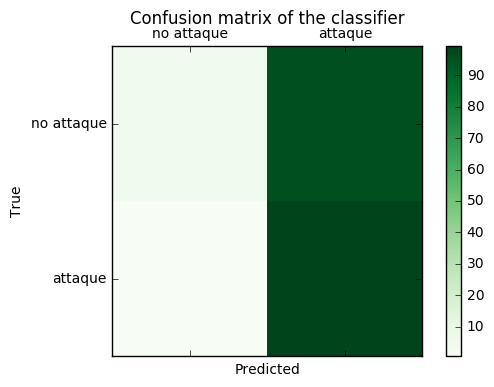

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# training
clf = clf.fit(X_train, y_train)
# classification
y_pred = clf.predict(X_test)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)
# performance

# la visualisation de l'arbre de décision 

In [15]:
'''
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['no attaque', 'attaque'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
'''

'\nimport os\nos.environ["PATH"] += os.pathsep + \'C:/Program Files (x86)/Graphviz2.38/bin/\'\nimport graphviz\nimport pydotplus\nfrom IPython.display import Image  \ndot_data = tree.export_graphviz(clf, out_file=None, \n                         feature_names=X.columns,  \n                         class_names=[\'no attaque\', \'attaque\'],  \n                         filled=True, rounded=True,  \n                         special_characters=True)  \ngraph = pydotplus.graph_from_dot_data(dot_data)  \nImage(graph.create_png())\n'

In [16]:
'''
graph.write_pdf("tree.pdf")
'''

'\ngraph.write_pdf("tree.pdf")\n'

# algorithme logistique régression 

metrics.confusion_matrix:
[[    0  3577]
 [    0 38648]]
metrics.accuracy_score:
0.915287152161
metrics.precision_score:
0.915287152161
metrics.recall_score:
1.0
metrics.f1_score:
0.955770158149
Confusion Matrix Stats
no attaque/no attaque: 0.00% (0/3577)
no attaque/attaque: 100.00% (3577/3577)
attaque/no attaque: 0.00% (0/38648)
attaque/attaque: 100.00% (38648/38648)


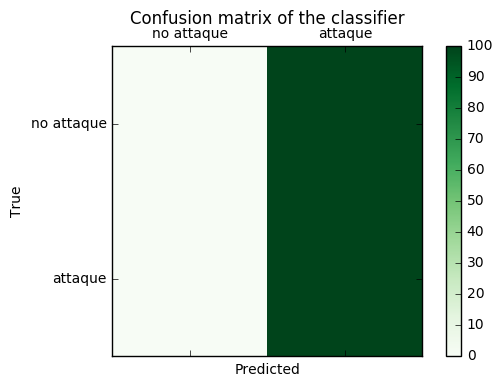

In [17]:
from sklearn.linear_model import LogisticRegression
# classifier
clf_log = LogisticRegression()
# training
clf_log = clf_log.fit(X_train, y_train)
# classification
y_pred = clf_log.predict(X_test)
# confusion matrix
labels = ['no attaque', 'attaque']
do_metrics(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

# algorithme de random forest

metrics.confusion_matrix:
[[  139  3438]
 [  172 38476]]
metrics.accuracy_score:
0.91450562463
metrics.precision_score:
0.917974900988
metrics.recall_score:
0.995549575657
metrics.f1_score:
0.955189791713
Confusion Matrix Stats
no attaque/no attaque: 3.89% (139/3577)
no attaque/attaque: 96.11% (3438/3577)
attaque/no attaque: 0.45% (172/38648)
attaque/attaque: 99.55% (38476/38648)


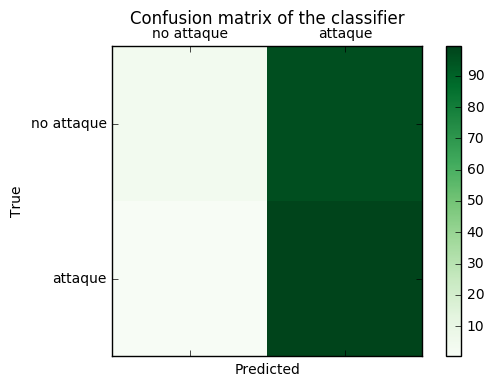

In [18]:
from sklearn.ensemble import RandomForestClassifier
# classifier
clf_rf = RandomForestClassifier()
# training
clf_rf = clf_rf.fit(X_train, y_train)
# classification
y_pred = clf_rf.predict(X_test)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

# algorithme Adaboost

metrics.confusion_matrix:
[[    0  3577]
 [    0 38648]]
metrics.accuracy_score:
0.915287152161
metrics.precision_score:
0.915287152161
metrics.recall_score:
1.0
metrics.f1_score:
0.955770158149
Confusion Matrix Stats
no attaque/no attaque: 0.00% (0/3577)
no attaque/attaque: 100.00% (3577/3577)
attaque/no attaque: 0.00% (0/38648)
attaque/attaque: 100.00% (38648/38648)


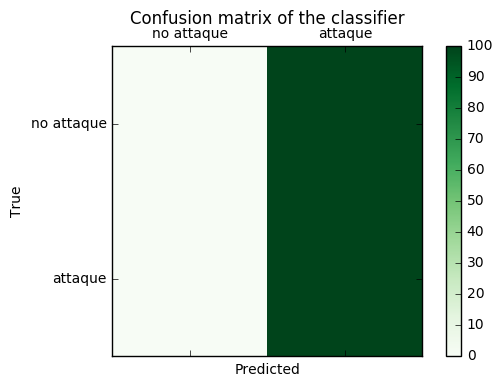

In [19]:
from sklearn.ensemble import AdaBoostClassifier
# classifier
clf_ada = AdaBoostClassifier(n_estimators=100)
# training
clf_ada = clf_ada.fit(X_train, y_train)
# classification
y_pred = clf_ada.predict(X_test)
# performance
do_metrics(y_test,y_pred)
# confusion matrix
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

# algorithme XGBoost

metrics.confusion_matrix:
[[   87  3490]
 [   10 38638]]
metrics.accuracy_score:
0.9171107164
metrics.precision_score:
0.917157235093
metrics.recall_score:
0.999741254399
metrics.f1_score:
0.956670298108
Confusion Matrix Stats
no attaque/no attaque: 2.43% (87/3577)
no attaque/attaque: 97.57% (3490/3577)
attaque/no attaque: 0.03% (10/38648)
attaque/attaque: 99.97% (38638/38648)


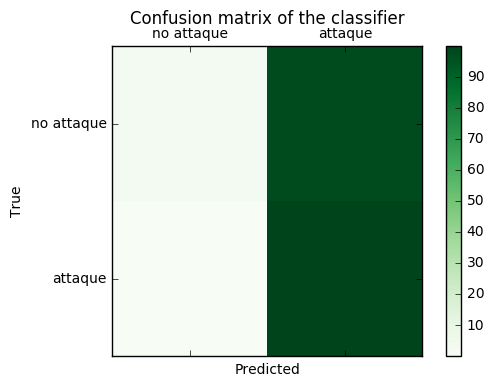

In [20]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier(max_depth=6, learning_rate=0.03, n_estimators=200, silent=True, objective='binary:logistic')
model.fit(X_train, y_train)
ans = model.predict(X_test)
do_metrics(y_test, ans)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, ans)
plot_cm(cm, labels)

# utiliser des features avec l'adresse ip en Random Forest

metrics.confusion_matrix:
[[ 3161   416]
 [   22 38626]]
metrics.accuracy_score:
0.989626998224
metrics.precision_score:
0.989344808155
metrics.recall_score:
0.999430759677
metrics.f1_score:
0.994362208778
Confusion Matrix Stats
no attaque/no attaque: 88.37% (3161/3577)
no attaque/attaque: 11.63% (416/3577)
attaque/no attaque: 0.06% (22/38648)
attaque/attaque: 99.94% (38626/38648)


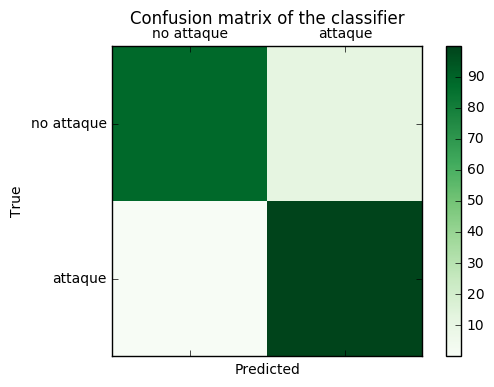

In [21]:
features = list(data_logs.columns[[0,8,9,10,12,13,14,15,16]])
X = data_logs[features]
y=data_logs['label']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
clf_rf = RandomForestClassifier()
# training
clf_rf = clf_rf.fit(X_train, y_train)
# classification
y_pred = clf_rf.predict(X_test)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

## utiliser des features avec le nombre de l'adresse ip de chaque logs en Random Forest

In [22]:
list_ip=np.array(data_logs['ip_address']).tolist()
def count_ip(x):
    ipcount=list_ip.count(x)
    return(ipcount)
data_logs['ipcount']=data_logs['ip_address'].apply(count_ip)
data_logs

,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword,ipcount
0,333,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1,6,0,0,0,0,7335
1,333,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1,6,0,0,0,0,7335
2,333,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1,6,0,0,0,0,7335
3,1424,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1,6,0,0,0,0,14674
4,1424,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1,6,0,0,0,0,14674
5,1424,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1,6,0,0,0,0,14674
6,333,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1,6,0,0,0,0,7335
7,333,22/Jan/2018,15,2,6,GET,director,123456,304,0,2,1,6,0,0,0,0,7335
8,333,22/Jan/2018,15,2,7,GET,director,123456,304,0,9,1,6,0,0,0,0,7335
9,1424,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1,6,0,0,0,0,14674


metrics.confusion_matrix:
[[ 3577     0]
 [    0 38648]]
metrics.accuracy_score:
1.0
metrics.precision_score:
1.0
metrics.recall_score:
1.0
metrics.f1_score:
1.0
Confusion Matrix Stats
no attaque/no attaque: 100.00% (3577/3577)
no attaque/attaque: 0.00% (0/3577)
attaque/no attaque: 0.00% (0/38648)
attaque/attaque: 100.00% (38648/38648)


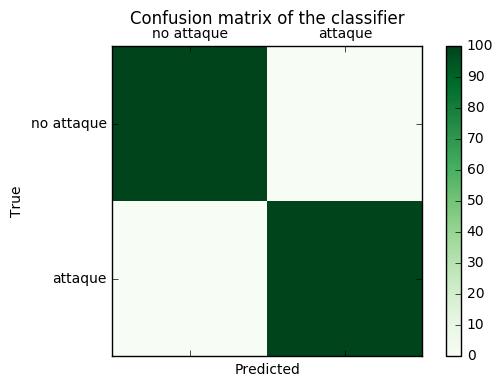

In [23]:
features = list(data_logs.columns[[8,9,10,12,13,14,15,16,17]])
X = data_logs[features]
y=data_logs['label']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
clf_rf = RandomForestClassifier()
# training
clf_rf = clf_rf.fit(X_train, y_train)
# classification
y_pred = clf_rf.predict(X_test)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)